
## Scoring algorithm

In [331]:
import pandas as pd
import numpy as np

### Unsupervised method (for other business types)

In [447]:
u_n = 10 #user enters no. of results he wants to see
category = 'Chinese Restaurant' #user enters category

In [448]:
scores_matrix = pd.read_csv('neighbor_category_scores_matrix.csv')
res = scores_matrix[category].values.argsort()[::-1][:100]
scores = pd.DataFrame(scores_matrix.ix[res, category])
neighbors = res
unsup_scores = scores[category].values
print(neighbors)

[86 89 87 43 83  8  2  9  5 69 73 76 95 25 56  0 18  4 17 31 13 77 93 97 72
 55 47 30 92 42 60 98 64 49 20 88 41 79 59  3 40 96 62 21 84 37 32 71 63 48
 78 81 74 61 28 53  1 50 45 85 94 15 38 44 22 29 51 33 26  6 82 58  7 24 14
 27 91 54 75 67 99 68 19 90 57 70 52 46 39 36 35 23 10 11 12 34 66 80 16 65]


In [449]:
locations = pd.read_csv("centroids_of_neighborhoods.csv")
recommended_neighbors = neighbors[:u_n]
recommended_locations = locations.ix[recommended_neighbors,]
print(recommended_locations)

    Unnamed: 0        lat        lng
86          86  40.680512 -73.873323
89          89  40.714038 -73.744252
87          87  40.883641 -73.868689
43          43  40.701749 -73.920029
83          83  40.757970 -73.831294
8            8  40.759391 -74.217670
2            2  40.672290 -73.731013
9            9  40.719204 -73.992479
5            5  40.746493 -73.890381
69          69  40.739374 -74.062017


In [450]:
# v = set(recommended_locations.index)
# v

{2, 5, 8, 9, 43, 69, 83, 86, 87, 89}

In [451]:
k = pd.read_csv('result_for_each_type.csv', index_col = 0)
k.head()

,0,1,2,3,4
Arts & Crafts Store,40.8321515483:-74.1525401211,40.7962769481:-73.7111114305,40.6148127858:-74.1512559646,40.8792444143:-74.2070505669,40.8114329612:-74.0013843413
Bridge,40.6236956507:-74.027527184,40.7210901096:-74.0414117638,40.8398712575:-73.9350460303,40.7455206639:-74.0320966137,40.8321515483:-74.1525401211
Home (private),40.9225294199:-73.9007278514,40.7141011978:-74.0878327043,40.9338866055:-73.9825742581,40.7306090224:-73.7999615687,40.8253963212:-74.2171400464
Medical Center,40.9384795545:-73.8506059835,40.6881573395:-74.1769115727,40.7579698312:-73.8312938799,40.7432416311:-73.9868694408,40.7569267771:-73.990762165
Food Truck,40.7569267771:-73.990762165,40.7541134708:-73.9772003522,40.7689507575:-73.9820553094,40.7608745772:-73.9654166699,40.7305674117:-73.8664362762


In [452]:
chin_top5 = k.ix['Chinese Restaurant',]
chin_top5

0    40.7393739739:-74.0620166583
1    40.7140378389:-73.7442517837
2    40.9432145486:-74.0285241664
3     40.8836412006:-73.868688649
4      40.68051217:-73.8733233584
Name: Chinese Restaurant, dtype: object

##### My scores + neighbors for Chinese not matching with Wei's - ask Wei for top neighbor labels as well

### Taking unsupervised scores for Chinese restaurants from Wei's dataframe

In [504]:
v = set(df_chin.sort(['unsupervised_score'], 0,False)[:10].index)
v

/Users/amla_srivastava/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


{7, 8, 9, 12, 18, 31, 39, 43, 83, 86}

### For Chinese food

In [505]:
df_chin.columns.values

array(['neighborhood', 'lat', 'lng', 'subway', 'competitors', 'rating',
       'review_count', 'price', 'unsupervised_score', 'uns_rank',
       'house_cost', 'rent', 'half-mile_sub_count', 'subway_c',
       'competitor_c', 'price_c', 'rating_c', 'review_count_c', 'rent_c'], dtype=object)

In [506]:
df_chin = pd.read_csv('scoring_df.csv', index_col = 0)
df_chin.head()

,neighborhood,lat,lng,subway,competitors,rating,review_count,price,unsupervised_score,uns_rank,house_cost,rent,half-mile_sub_count
0,0,40.928858,-74.122526,0,1,0.000000,0.000000,0.000000,0.004904,49,67.122374,67.122374,0
1,1,40.743242,-73.986869,63,9,3.500000,191.979592,1.612245,0.002917,83,102.990179,102.990179,67
2,2,40.672290,-73.731013,0,7,0.000000,0.000000,0.000000,0.010292,12,54.899645,54.899645,0
3,3,40.839871,-73.935046,80,5,3.541667,60.333333,1.083333,0.002598,91,31.896899,31.896899,10
4,4,40.714101,-74.087833,0,4,0.000000,0.000000,0.000000,0.006114,34,29.377612,29.377612,0


### Exploring feature distributions - subways, competitors, price, rating, reviews

In [507]:
import matplotlib.pyplot as plt

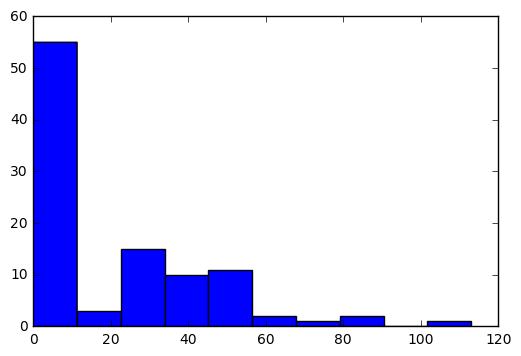

0      49
29      5
53      4
33      3
51      3
23      2
37      2
38      2
44      2
32      2
6       2
30      1
17      1
13      1
8       1
24      1
7       1
28      1
5       1
1       1
14      1
113     1
34      1
83      1
42      1
45      1
46      1
47      1
48      1
49      1
58      1
63      1
68      1
80      1
36      1
Name: subway, dtype: int64

In [508]:
plt.hist(df_chin['subway'])
plt.show()

df_chin['subway'].value_counts()

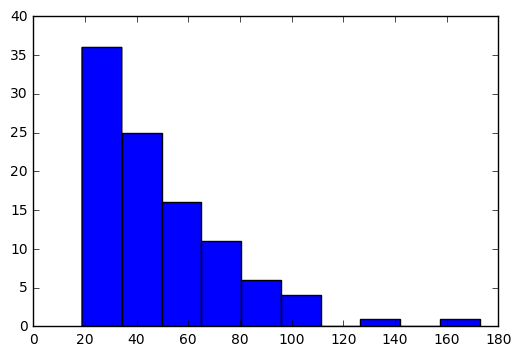

52.753333     6
18.860000     4
25.000000     4
47.080000     3
40.166667     3
107.516667    2
71.312500     2
62.230000     2
20.933333     2
39.239683     1
35.000000     1
36.976720     1
37.815824     1
38.434483     1
28.371429     1
40.927794     1
33.104659     1
41.941638     1
24.166667     1
47.070000     1
45.910000     1
33.777778     1
24.500000     1
34.800000     1
29.377612     1
31.896899     1
38.830000     1
133.684000    1
45.443333     1
29.371183     1
             ..
50.500000     1
28.769370     1
54.899645     1
25.916667     1
102.990179    1
24.250000     1
44.500000     1
29.333333     1
45.943333     1
41.266667     1
83.516667     1
81.065250     1
77.095283     1
34.066667     1
83.916799     1
57.776667     1
58.244953     1
33.400000     1
60.608571     1
61.293333     1
26.750000     1
67.122374     1
68.068454     1
69.913439     1
70.625000     1
33.000000     1
73.000000     1
74.467799     1
75.613793     1
30.000000     1
Name: rent, dtype: int64

In [509]:
plt.hist(df_chin['rent'])
plt.show()

df_chin['rent'].value_counts()

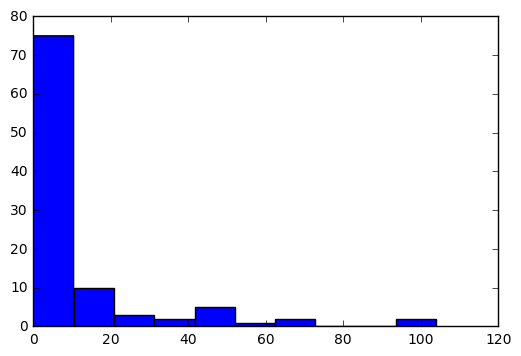

0      53
8       5
10      5
2       3
51      3
4       3
11      3
1       2
3       2
20      2
14      1
5       1
6       1
12      1
13      1
104     1
15      1
94      1
22      1
24      1
25      1
33      1
34      1
43      1
46      1
58      1
67      1
69      1
17      1
Name: half-mile_sub_count, dtype: int64

In [510]:
plt.hist(df_chin['half-mile_sub_count'])
plt.show()

df_chin['half-mile_sub_count'].value_counts()


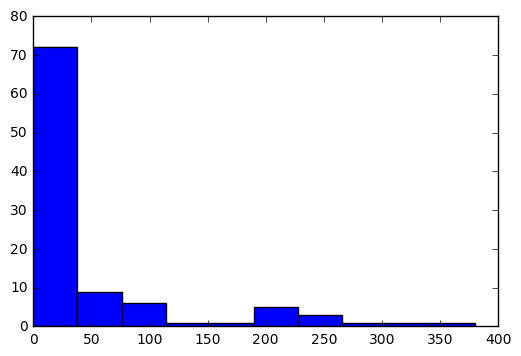

0.000000      63
23.153846      1
185.000000     1
49.000000      1
46.192308      1
32.800000      1
33.000000      1
288.000000     1
29.882353      1
22.500000      1
249.851852     1
18.125000      1
333.413793     1
140.580645     1
73.727273      1
6.000000       1
4.000000       1
257.313043     1
60.333333      1
379.800000     1
193.685714     1
66.600000      1
242.000000     1
113.562500     1
227.022222     1
95.400000      1
93.000000      1
10.964286      1
84.482759      1
193.166667     1
81.259259      1
77.500000      1
203.025641     1
74.000000      1
73.333333      1
71.250000      1
70.250000      1
191.979592     1
Name: review_count, dtype: int64

In [511]:
plt.hist(df_chin['review_count'])
plt.show()
df_chin['review_count'].value_counts()

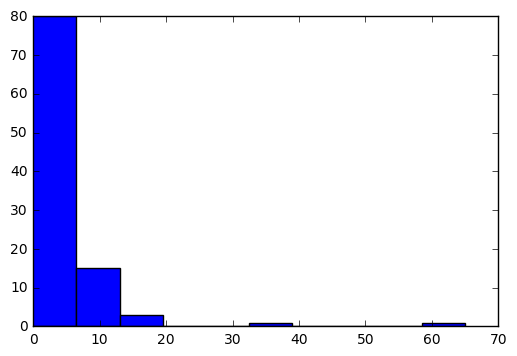

0     18
1     17
3     13
2     12
5      9
4      8
8      5
7      4
6      3
12     3
9      2
35     1
10     1
13     1
15     1
16     1
65     1
Name: competitors, dtype: int64

In [512]:
plt.hist(df_chin['competitors'])
plt.show()

df_chin['competitors'].value_counts()

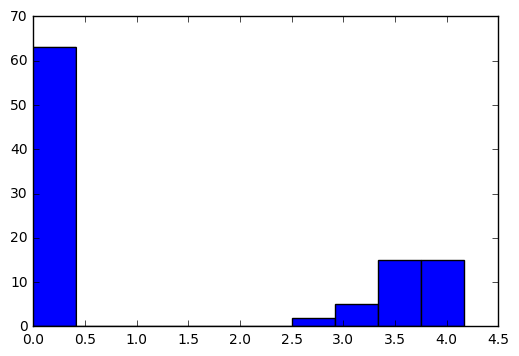

0.000000    63
4.000000     5
3.500000     3
3.333333     2
3.225000     1
2.862069     1
4.100000     1
3.620690     1
3.145161     1
3.371429     1
3.383333     1
3.541667     1
2.750000     1
4.115385     1
3.433333     1
3.888889     1
3.812500     1
3.480769     1
3.814815     1
3.482143     1
3.900000     1
4.166667     1
3.766667     1
3.643478     1
3.875000     1
3.666667     1
3.833333     1
3.558824     1
3.406250     1
3.111111     1
3.600000     1
Name: rating, dtype: int64

In [513]:
plt.hist(df_chin['rating'])
plt.show()
df_chin['rating'].value_counts()

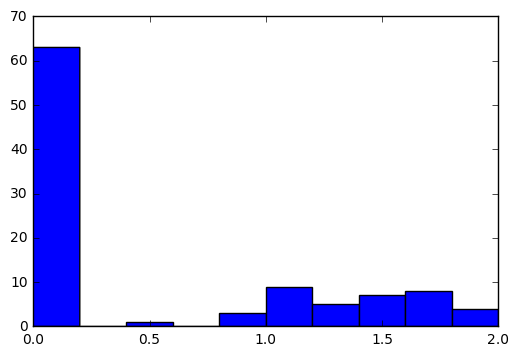

0.000000    63
1.000000     4
1.400000     2
2.000000     2
1.644444     1
1.612245     1
0.875000     1
0.500000     1
1.148148     1
1.615385     1
1.333333     1
1.291304     1
1.454545     1
1.437500     1
0.941176     1
1.777778     1
1.888889     1
1.413793     1
1.250000     1
1.741379     1
1.433333     1
1.625000     1
1.178571     1
1.714286     1
1.083333     1
1.750000     1
1.500000     1
1.833333     1
0.846154     1
1.115385     1
1.580645     1
1.421053     1
1.133333     1
Name: price, dtype: int64

In [514]:
plt.hist(df_chin['price'])
plt.show()
df_chin['price'].value_counts()

## Buckets

All encoded as 1-5 for users input

- Subways: 0-10, 10-20, 20-30, 30-40, 40+
- Competitors: 0-5, 5-10, 10-15, 15-20, 20+
- Price: 0.0-1.0, 1.0-1.5, 1.5-2.0,2.0-2.5,2.5+
- Rating: 0-1, 1-2, 2-3, 3-4, 4-5
- Review count: 0-50, 50-100, 100-200, 200-300, 300+
- Rent: 

In [515]:
df_chin['subway_c'] = pd.cut(df_chin['half-mile_sub_count'],[min(df_chin['half-mile_sub_count'])-1,10,20,30,40, max(df_chin['half-mile_sub_count'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [516]:
df_chin['competitor_c'] = pd.cut(df_chin['competitors'],[min(df_chin['competitors'])-1,5,10,15,20, max(df_chin['competitors'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [517]:
df_chin['price_c'] = pd.cut(df_chin['price'],[min(df_chin['price'])-1, 1.0,1.5,2.0,2.5, max(df_chin['price'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [518]:
df_chin['rating_c'] = pd.cut(df_chin['rating'],[min(df_chin['rating'])-1, 1,2,3,4, max(df_chin['rating'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [519]:
df_chin['review_count_c'] = pd.cut(df_chin['review_count'],[min(df_chin['review_count'])-1, 50,100,200,300, max(df_chin['review_count'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [520]:
df_chin['rent_c'] = pd.cut(df_chin['rent'],[min(df_chin['rent'])-1,25,50,75,100, max(df_chin['rent'])+1], labels = [1,2,3,4,5], retbins=True)[0]

In [521]:
df_chin.head()

,neighborhood,lat,lng,subway,competitors,rating,review_count,price,unsupervised_score,uns_rank,house_cost,rent,half-mile_sub_count,subway_c,competitor_c,price_c,rating_c,review_count_c,rent_c
0,0,40.928858,-74.122526,0,1,0.000000,0.000000,0.000000,0.004904,49,67.122374,67.122374,0,1,1,1,1,1,3
1,1,40.743242,-73.986869,63,9,3.500000,191.979592,1.612245,0.002917,83,102.990179,102.990179,67,5,2,3,4,3,5
2,2,40.672290,-73.731013,0,7,0.000000,0.000000,0.000000,0.010292,12,54.899645,54.899645,0,1,2,1,1,1,3
3,3,40.839871,-73.935046,80,5,3.541667,60.333333,1.083333,0.002598,91,31.896899,31.896899,10,1,1,2,4,2,2
4,4,40.714101,-74.087833,0,4,0.000000,0.000000,0.000000,0.006114,34,29.377612,29.377612,0,1,1,1,1,1,2


## SCORING ALGORITHM

In [522]:
#penalty terms(>0) - ask user to change
alpha = 1
alpha1 = 1 
alpha2 = 1
alpha3 = 1
alpha4 = 1

def pop_score(df, n,u_pop):
    return np.exp(-alpha * abs(df.ix[n,'population_density']-u_pop))

def rent_score(df, n, u_rent):
    print('\nRent')
    print('-----')
    print('user: ', u_rent)
    print('neigh: ', df.ix[n,'rent_c'] )
    if df.ix[n,'rent'] <= u_rent:
        return 1
    else:
        return np.exp(-alpha1 * abs(df.ix[n,'rent_c']- u_rent))
    
def comp_score(df, n, u_comp):
    print('\nComp')
    print('-----')
    print('user: ', u_comp)
    print('neigh: ', df.ix[n,'competitor_c'] )
    return np.exp(-alpha2 * abs(df.ix[n,'competitor_c'] - u_comp))

def conn_score(df, n, u_conn):
    print('\nConn')
    print('-----')
    print('user: ', u_conn)
    print('neigh: ',df.ix[n,'subway_c'] )
    
    if df.ix[n,'subway_c'] >= u_conn:
        return 1
    else:
        return np.exp(-alpha3 * abs(df.ix[n,'subway_c']- u_conn))

#assuming user wants to open up in a location where he is not competing on price?
def price_score(df, n, u_price):
    print('\nPrice')
    print('-----')
    print('user: ', u_price)
    print('neigh: ',df.ix[n,'price_c'] )
    return np.exp(-alpha4 * abs(df.ix[n,'price_c'] - u_price))


In [523]:
# all score values should be between 0 and 1
# all weights should be between 0 and 1

    
def score(df, n, weights, u_comp, u_conn, u_price,u_rent):
    
    b = rent_score(df,n,u_rent)
    c = comp_score(df, n, u_comp)
    d = conn_score(df, n, u_conn)
    e = price_score(df, n, u_price)
    
    print()
    print('\nScores')
    print('--------')
    print('Comp score: ',c)
    print('Conn score: ',d)
    print('Price score: ',e)
    print('Unsup score:', df_chin.ix[n,'unsupervised_score'])
    print('Rating: ',df.ix[n,'rating']/5)
    print('Count of reviews: ',df.ix[n,'review_count']/max(df['review_count']))
    
    
    final_score = (weights[0] * df_chin.ix[n,'unsupervised_score']/max(df_chin['unsupervised_score']))  + (weights[1] * c) + (weights[2] * d) + (weights[3] * e) + (weights[4] * (df.ix[n,'rating']/5)) + (weights[5] * (df.ix[n,'review_count']/max(df['review_count']))) + (weights[6] * b) 
    print('Final score: ',final_score)
    return final_score
    


In [524]:
#checking scores for different neighbors
n = 9
#weight is an array of wts for unsup_score, competitor,connectivity,price, rating, review count
weights = [0.4,0.1,0.1,0.1,0.1,0.1,0.1] 
p = score(df_chin, n, weights, u_comp = 3, u_conn = 3, u_price = 3, u_rent = 3)


Rent
-----
user:  3
neigh:  4

Comp
-----
user:  3
neigh:  5

Conn
-----
user:  3
neigh:  5

Price
-----
user:  3
neigh:  2


Scores
--------
Comp score:  0.135335283237
Conn score:  1
Price score:  0.367879441171
Unsup score: 0.011334991461
Rating:  0.728695652174
Count of reviews:  0.67749616503
Final score:  0.429457958987


### Code to recommend top locations based on user preferences

In [525]:
# evaluation - no. of existing such restaurants , no. of resturants that closed down
# for recommended locations, just pull from big dataframe

#take weights, u_pop, u_rent, u_comp, u_conn, u_price from user
prefscores = np.zeros((100,))
weights = [0.5,0.1,0.1,0.1,0.05,0.05,0.1]
u_conn = 3
u_comp = 3
u_price = 3
u_rent = 2

for n in df_chin.index.values:
    prefscores[n] = score(df_chin, n, weights, u_comp, u_conn, u_price, u_rent)

recommended_neighbors = prefscores.argsort()[::-1][:u_n]
recommended_scores = prefscores[recommended_neighbors]


Rent
-----
user:  2
neigh:  3

Comp
-----
user:  3
neigh:  1

Conn
-----
user:  3
neigh:  1

Price
-----
user:  3
neigh:  1


Scores
--------
Comp score:  0.135335283237
Conn score:  0.135335283237
Price score:  0.135335283237
Unsup score: 0.00490352652156
Rating:  0.0
Count of reviews:  0.0
Final score:  0.132398784276

Rent
-----
user:  2
neigh:  5

Comp
-----
user:  3
neigh:  2

Conn
-----
user:  3
neigh:  5

Price
-----
user:  3
neigh:  3


Scores
--------
Comp score:  0.367879441171
Conn score:  1
Price score:  1.0
Unsup score: 0.00291713652151
Rating:  0.7
Count of reviews:  0.505475491935
Final score:  0.334766347142

Rent
-----
user:  2
neigh:  3

Comp
-----
user:  3
neigh:  2

Conn
-----
user:  3
neigh:  1

Price
-----
user:  3
neigh:  1


Scores
--------
Comp score:  0.367879441171
Conn score:  0.135335283237
Price score:  0.135335283237
Unsup score: 0.0102916451499
Rating:  0.0
Count of reviews:  0.0
Final score:  0.216099856048

Rent
-----
user:  2
neigh:  2

Comp
-----
us

In [526]:
recommended_scores

array([ 0.64060058,  0.52369188,  0.49900418,  0.48247663,  0.45585576,
        0.43296629,  0.43067982,  0.41479184,  0.41418755,  0.39888935])

In [527]:
recommended_locations_user = locations.ix[recommended_neighbors,]
recommended_locations_user

,Unnamed: 0,lat,lng
86,86,40.680512,-73.873323
38,38,40.742266,-74.002009
31,31,40.581963,-73.978367
83,83,40.757970,-73.831294
12,12,40.730609,-73.799962
18,18,40.758776,-73.745600
8,8,40.759391,-74.217670
74,74,40.754113,-73.977200
71,71,40.693027,-73.989982
5,5,40.746493,-73.890381


In [528]:
u = set(recommended_locations_user.index)

In [529]:
print('Custom locations: ',u) #user locations

Custom locations:  {5, 38, 71, 8, 74, 12, 18, 83, 86, 31}


In [530]:
print('Unsupervised location: ',v) #unsupervised location

Unsupervised location:  {39, 8, 7, 9, 43, 12, 18, 83, 86, 31}


In [531]:
print('Common locations: ', u.intersection(v))

Common locations:  {8, 12, 18, 83, 86, 31}


### Results 
